In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [10]:
def generate_data(num_samples, weights):

    # Generate x values
    y_size,x_size = weights.shape
    # print(x_size,y_size)
    x = np.random.uniform(0, 10, num_samples*x_size).reshape((x_size,num_samples))
    # print(x)
    # Generate y values with noise
    noise = np.random.normal(0, 0.001, num_samples*y_size).reshape((y_size,num_samples))
    y = np.dot(weights,x) + noise
    # print(y)
    data = [(x[:,i], y[:,i]) for i in range(num_samples)]
    # print(data)
    return data
    
# Generate some example data
weights = np.random.rand(10,6)
example_data = generate_data(10,weights)
train_data = generate_data(20000,weights)
val_data = generate_data(100,weights)

class TrendlineDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data
        x = torch.tensor(sample[idx][0], dtype=torch.float32)
        # print(x.shape)
        target = torch.tensor(sample[idx][1], dtype=torch.float32)
        return x, target

train_dataset = TrendlineDataset(train_data)
train_dataset[0]
val_dataset = TrendlineDataset(val_data)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
print(next(iter(train_loader))[1].shape)

torch.Size([100, 10])


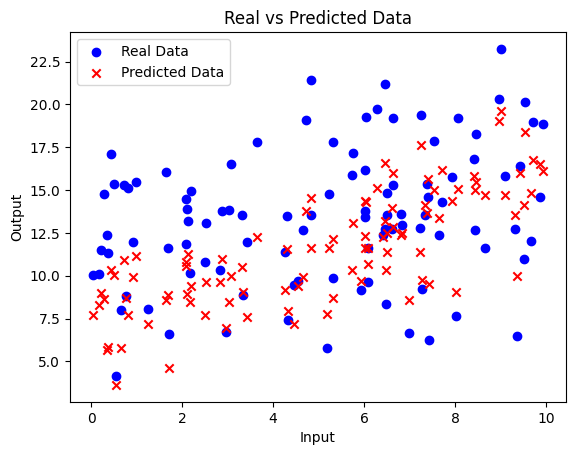

epoch 0, loss 385.0134582519531
epoch 1, loss 276.36669921875
epoch 2, loss 199.18106079101562
epoch 3, loss 145.8803253173828
epoch 4, loss 95.51054382324219
epoch 5, loss 63.45269012451172
epoch 6, loss 49.547664642333984
epoch 7, loss 39.280826568603516
epoch 8, loss 23.731983184814453
epoch 9, loss 20.910335540771484


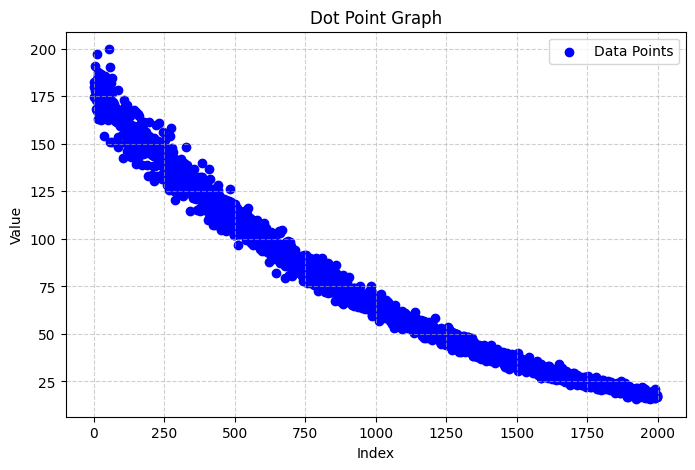

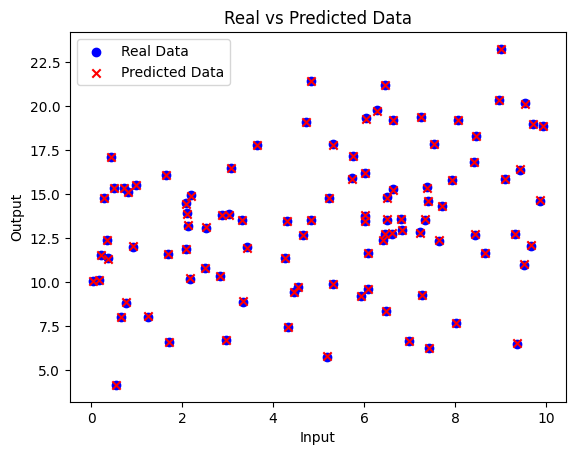

In [5]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.weights = torch.nn.Parameter(torch.randn(outputSize, inputSize))
        
    def forward(self, x):
        out = torch.mm(self.weights,x) 
        return out

def plot_dot_graph(values):
    """Plots an array of values as a dot point graph."""
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(values)), values, color='b', label='Data Points')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Dot Point Graph')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def Train(model,train_loader, epochs,lr):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    gradients = []
    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            x,target = batch
            x = x.T
            target = target.T
            # print(x,target)        
            # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
            optimizer.zero_grad()
        
            # get output from the model, given the inputs
            outputs = model(x)
            # print("x",x.shape, x)
            # print("output",outputs.shape, outputs)
            # print("target",target.shape, target)
            # get loss for the predicted output
            loss = criterion(outputs, target)
            # print(loss)
            # get gradients w.r.t to parameters
            loss.backward()
            for name, param in model.named_parameters():
                if param.grad is not None:
                    gradients.append(param.grad.norm().item())
            optimizer.step()
    
        print('epoch {}, loss {}'.format(epoch, loss.item()))
    plot_dot_graph(gradients)    

def visualise_predictions(model, data, dim = 0):
    # print([d[1][0] for d in data])
    real_points = np.array([[d[0][dim] for d in data], [d[1][1] for d in data]]).T  # Ensure data is a NumPy array
    # print(real_points)
    pred_points = np.zeros_like(real_points)  # Initialize predictions array

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking for efficiency
        for i, point in enumerate(data):
            x = torch.tensor([point[0]], dtype=torch.float32).T
            # print("x", x, x.shape)
            pred = model(x).T
            # print("pred", pred, pred.shape)
            pred_points[i] = np.array([point[0][dim], pred.numpy()[0,1]])

    # Plot real vs predicted points
    plt.scatter(real_points[:, 0], real_points[:, 1], color='blue', label="Real Data")
    plt.scatter(pred_points[:, 0], pred_points[:, 1], color='red', label="Predicted Data", marker='x')
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.title("Real vs Predicted Data")
    plt.show()


input_size = 6
output_size = 10
learning_rate = 0.001
num_epochs = 10

model = linearRegression(input_size,output_size)
# Train(model,train_loader,num_epochs,learning_rate)
visualise_predictions(model,val_data,dim = 0)
Train(model,train_loader,num_epochs,learning_rate)
visualise_predictions(model,val_data)
